### Projeto de classificação de multiclasses
#### O intuito do projeto é construir um modelo de predição que seja capaz de classificar as pessoas em 3 tipos
    - Diabéticas - 1
    - Pré diabéticas - 2
    - Não diabéticas - 0

### Primeiro passo: EDA (Análise exploratória de dados)

In [119]:
import pandas as pd

df = pd.read_csv("diabetes.csv")

### Plotagem da distribuição de classes usando gráfico de torta
### Plotagem dos dados usando uma boxplot

Essa etapa visa visualizar a distribuição dos dados para uma análise mais profunda, também é útil para visualização de outliers

- Como os dados são do contexto médico, nem sempre tirar os outliers é a melhor escolha, por isso, não vou tirar os outliers. Outro motivo para isso é que vou utilizar o algoritmo Random Forest, devido a natureza do modelo eçe consegue lidar bem com outliers

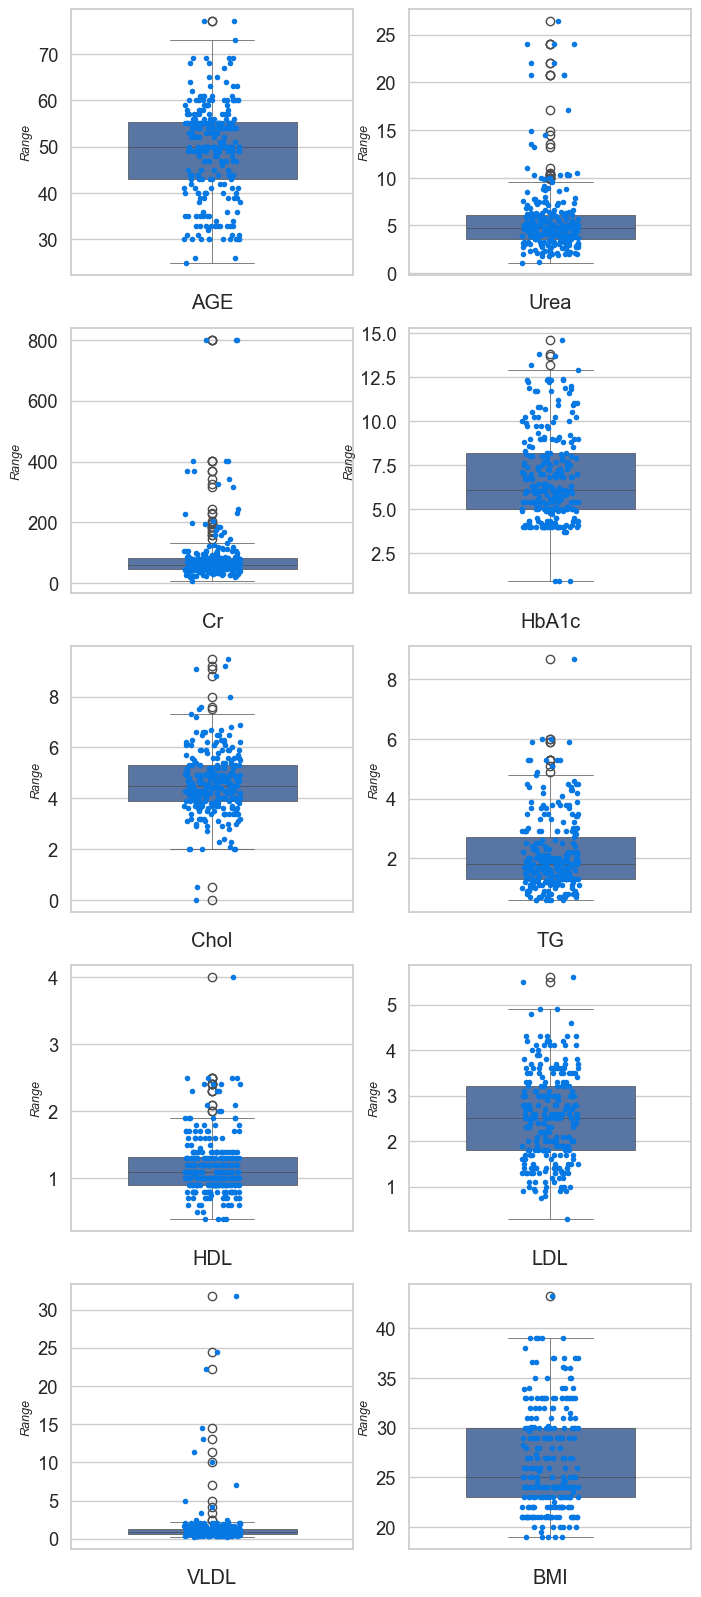

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(8,20),width_ratios=[2,2],height_ratios=[4,4,4,4,4])

axes_flat = axes.flatten()
fig.set_facecolor("white")
columns = df.columns[1:-1]
axes_columns = zip(columns,axes_flat)
sns.set_theme('notebook',font_scale=1.2,style='whitegrid')

for column,axe in axes_columns:
    sns.boxplot(data=df,y=df[column],ax=axe,linewidth=0.5,width=0.6)
    axe.set_ylabel("Range",fontdict={'fontsize':9,'fontfamily':'Arial','style':'italic'})
    axe.set_xlabel(column)
    axe.patch.set_edgecolor('red')
    sns.stripplot(ax=axe,data=df,y=df[column],size=4,jitter=True,color='#0578e4')

plt.show()




### Plotar a distribuição de classes


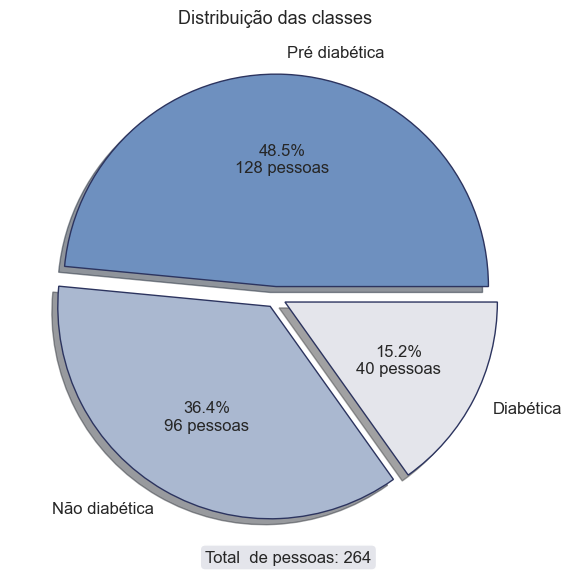

In [121]:
valores = df['Class'].value_counts()

cores = sns.color_palette("vlag").as_hex()
plt.figure(figsize=(6,6))
plt.title("Distribuição das classes",fontdict={"fontsize":13,'fontfamily':"Arial"})
pie = plt.pie(x=valores,labels=['Pré diabética','Não diabética','Diabética'],colors=cores,explode=(0.05,0.05,0.05)
              ,shadow=True,autopct="%1.1f%%",textprops={'fontsize':12,'fontfamily':"Arial"})
textos = pie[2]
wedges = pie[0]

wedges[0].set_edgecolor('#2c345f')
wedges[1].set_edgecolor("#2c345f")
wedges[2].set_edgecolor("#2c345f")

texto_wedge1 = textos[0].get_text() + '\n' + f'{valores[2]} pessoas'
textos[0].set_text(texto_wedge1)
texto_wedge2 = textos[1].get_text() + '\n' + f'{valores[0]} pessoas'
textos[1].set_text(texto_wedge2)
texto_wedge3 = textos[2].get_text() + '\n' + f'{valores[1]} pessoas'
textos[2].set_text(texto_wedge3)

info = f"Total  de pessoas: {sum(valores)}"
plt.figtext(0.5,0.04,info,bbox={'boxstyle':'round','facecolor':'#e4e5eb'},ha='center',fontdict=
            {'fontsize':12,
             'fontweight':'light',
             'fontfamily':'Arial'})

plt.tight_layout()
plt.show()



- Como esse dataset já foi tratado por um usuário do Kaggle, não sobraram dados nulo, vazios e nem nada do tipo, por isso a etapa de EDA foi mais focada na visualização dos dados

### 2 etapa: Estratificar os dados
Como o modelo que vou utilizar é o Random Forest, não será necessário normalizar os dados


In [122]:
from sklearn.model_selection import train_test_split
x = df.drop(axis=1,columns=['Class'])
y = df['Class']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3,train_size=0.7,stratify=y)

### 3 etapa: Treinar o modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

model = RandomForestClassifier(n_estimators=50,max_depth=5,max_features='sqrt',min_samples_leaf=5,min_samples_split=5,random_state=42)
model.fit(x_train,y_train)
ans = model.predict(x_test)
acuracy = accuracy_score(y_pred=ans,y_true=y_test)


print(f'{acuracy*100}%')
print(classification_report(y_true=y_test,y_pred=ans))



96.25%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.92      0.96        12
           2       0.97      0.95      0.96        39

    accuracy                           0.96        80
   macro avg       0.97      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80

3
